Acceso al directorio local

In [70]:
%cd "C:\\Users\\jorge\\Documents\\Videogames_img\\TC3002B"
#!ls

C:\Users\jorge\Documents\Videogames_img\TC3002B


C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Importar librerias y definir directorios de carpetas de Train y Test

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Dataset'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')
batch_size = 32

Generar dataset de Train

Found 8000 images belonging to 10 classes.
{'Among Us': 0, 'Apex Legends': 1, 'Fortnite': 2, 'Forza Horizon': 3, 'Free Fire': 4, 'Genshin Impact': 5, 'God of War': 6, 'Minecraft': 7, 'Roblox': 8, 'Terraria': 9}


<Figure size 640x480 with 0 Axes>

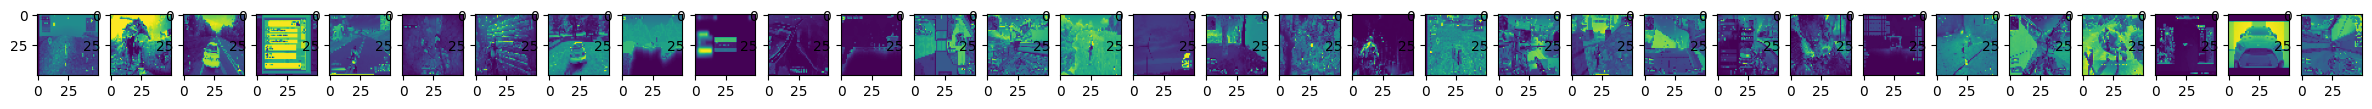

In [72]:
train_ds = ImageDataGenerator(
    rescale = 1./255,
    #zoom_range = 0.3,
    #shear_range = 0.3
    )


train_generator = train_ds.flow_from_directory(
    train_dir,
    target_size = (50,50),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

class_names = train_generator.class_indices
print(class_names)

images , labels = train_generator[0]
plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

Generar dataset para validation

Generar y preparar dataset de Test

In [73]:
test_ds = ImageDataGenerator(
    rescale = 1./255,
    #zoom_range = 0.3,
    #shear_range = 0.3
    )


test_generator = train_ds.flow_from_directory(
    test_dir,
    target_size = (50,50),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)


Found 2000 images belonging to 10 classes.


# Modelo Base

In [81]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.InputLayer(input_shape = (50,50,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), padding = 'same'))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(64,activation='sigmoid'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(10,activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['acc'])

history = model.fit(
						train_generator,
						epochs = 5)

acc = history.history['acc']
loss = history.history['loss']

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 22, 22, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       991,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,218 (3.86 MB)

 Trainable params: 1,011,218 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - acc: 0.3464 - loss: 1.8950
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - acc: 0.8999 - loss: 0.4554
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 227s 887ms/step - acc: 0.9519 - loss: 0.2139
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 245s 968ms/step - acc: 0.9709 - loss: 0.1198
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 224s 881ms/step - acc: 0.9824 - loss: 0.0791


In [82]:
model.save('videogame_img_v1.h5')

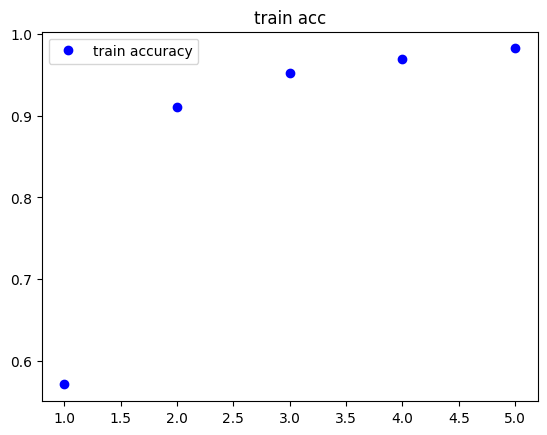

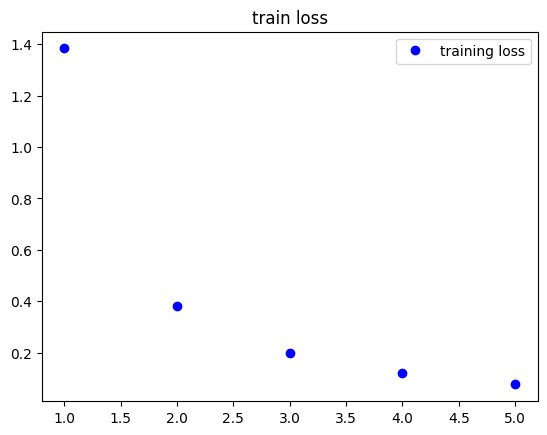

In [83]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_loss_original, test_acc_original = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc_original)

https://www.iasj.net/iasj/download/7e648e76d9363337

https://www.researchgate.net/profile/Mohd-Azlan-Abu/publication/332850035_A_study_on_Image_Classification_based_on_Deep_Learning_and_Tensorflow/links/5cccd2dfa6fdccc9dd8b3e69/A-study-on-Image-Classification-based-on-Deep-Learning-and-Tensorflow.pdf
